In [1]:
content = ''
with open('../dataset/oxygen.txt', encoding='utf-8') as f:
    for l in f:
        nl = l.strip().replace(' ', '')
        content += nl
# print(content)
content = content.split("AA550F0702")[1:-1]
# print(content)
hexstr = ''
for i in content:
    hexstr += i[:12]
print(hexstr)

2C29262421D01F1D1A18173A1513121111D81213182231B84457656C6CC167605AD44F8D4944403B37DE33302C29260824211F1C1A671816151312BC1010111215521C293A4E5FFF696D6A635D21D7514C4742F53E3A36322F8C2B2824221F4A1D1B191715F01412111011BA1113182231F64456646B6B08665F59D34E464944403C38F135322F2C29C92622201E1CA11A18161413FE1111121315301D293A4E5F326A6D6A635D6FD7514C4742F53E3A373331612E2B282522861F1D1B19175515141211115E1214192332B34558666C6C72676059D44E374944403C38F135312E2B28DA2623201E1C2E1918161412EE1111111316361D2A3B4E5F11696D69625BDCD54F4A4641AC3D3936322F4A2C29262320E01E1C1A1816261513111010A61113172230F74356646A6AC3655E58D24D0A47423E3A36F433302D2A27A824221F1C1AEF18161513115E1010101113711B27384B5CE9666A676059ECD44E48433FB93A3733302D162A2724211F481C1A1816148312100F0E0E730F1116202FC84154626869E5645C56D04B7846423D39356A312D2A2825D923211F1C1A3618151312109D0F0F101113C01B2637495A756468655E5888D24C47423D05393633302DD72A2623211EE31C1A181615DD1312111010B5111217212FF1415361676780625B55CF4A2C45413D3935AC322F2C2926672421

In [2]:
bs = bytes.fromhex(hexstr)
data = []
for i in bs:
    data.append(i)
data=data[:7000]
data

[44,
 41,
 38,
 36,
 33,
 208,
 31,
 29,
 26,
 24,
 23,
 58,
 21,
 19,
 18,
 17,
 17,
 216,
 18,
 19,
 24,
 34,
 49,
 184,
 68,
 87,
 101,
 108,
 108,
 193,
 103,
 96,
 90,
 212,
 79,
 141,
 73,
 68,
 64,
 59,
 55,
 222,
 51,
 48,
 44,
 41,
 38,
 8,
 36,
 33,
 31,
 28,
 26,
 103,
 24,
 22,
 21,
 19,
 18,
 188,
 16,
 16,
 17,
 18,
 21,
 82,
 28,
 41,
 58,
 78,
 95,
 255,
 105,
 109,
 106,
 99,
 93,
 33,
 215,
 81,
 76,
 71,
 66,
 245,
 62,
 58,
 54,
 50,
 47,
 140,
 43,
 40,
 36,
 34,
 31,
 74,
 29,
 27,
 25,
 23,
 21,
 240,
 20,
 18,
 17,
 16,
 17,
 186,
 17,
 19,
 24,
 34,
 49,
 246,
 68,
 86,
 100,
 107,
 107,
 8,
 102,
 95,
 89,
 211,
 78,
 70,
 73,
 68,
 64,
 60,
 56,
 241,
 53,
 50,
 47,
 44,
 41,
 201,
 38,
 34,
 32,
 30,
 28,
 161,
 26,
 24,
 22,
 20,
 19,
 254,
 17,
 17,
 18,
 19,
 21,
 48,
 29,
 41,
 58,
 78,
 95,
 50,
 106,
 109,
 106,
 99,
 93,
 111,
 215,
 81,
 76,
 71,
 66,
 245,
 62,
 58,
 55,
 51,
 49,
 97,
 46,
 43,
 40,
 37,
 34,
 134,
 31,
 29,
 27,
 25,
 23,
 85,
 21

In [3]:
import numpy as np

arr = np.array(data).reshape(-1,1000)
arr

array([[ 44,  41,  38, ...,  27,  26,  24],
       [ 22, 160,  20, ...,  58,  18,  20],
       [ 25,  35,  50, ..., 106, 104,  94],
       ...,
       [ 56, 226,  53, ...,  86,  35,  33],
       [ 31,  29,  27, ...,  18,  17, 214],
       [ 17,  17,  18, ...,  56,  75,  92]])

In [4]:
import pandas as pd

df = pd.DataFrame(arr)
df = df.T
df

,0,1,2,3,4,5,6
0,44,22,25,98,56,31,17
1,41,160,35,92,226,29,17
2,38,20,50,214,53,27,18
3,36,19,179,80,51,172,19
4,33,17,68,75,48,24,26
...,...,...,...,...,...,...,...
995,177,17,91,235,40,21,37
996,30,18,102,70,38,20,39
997,27,58,106,66,86,18,56
998,26,18,104,62,35,17,75


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

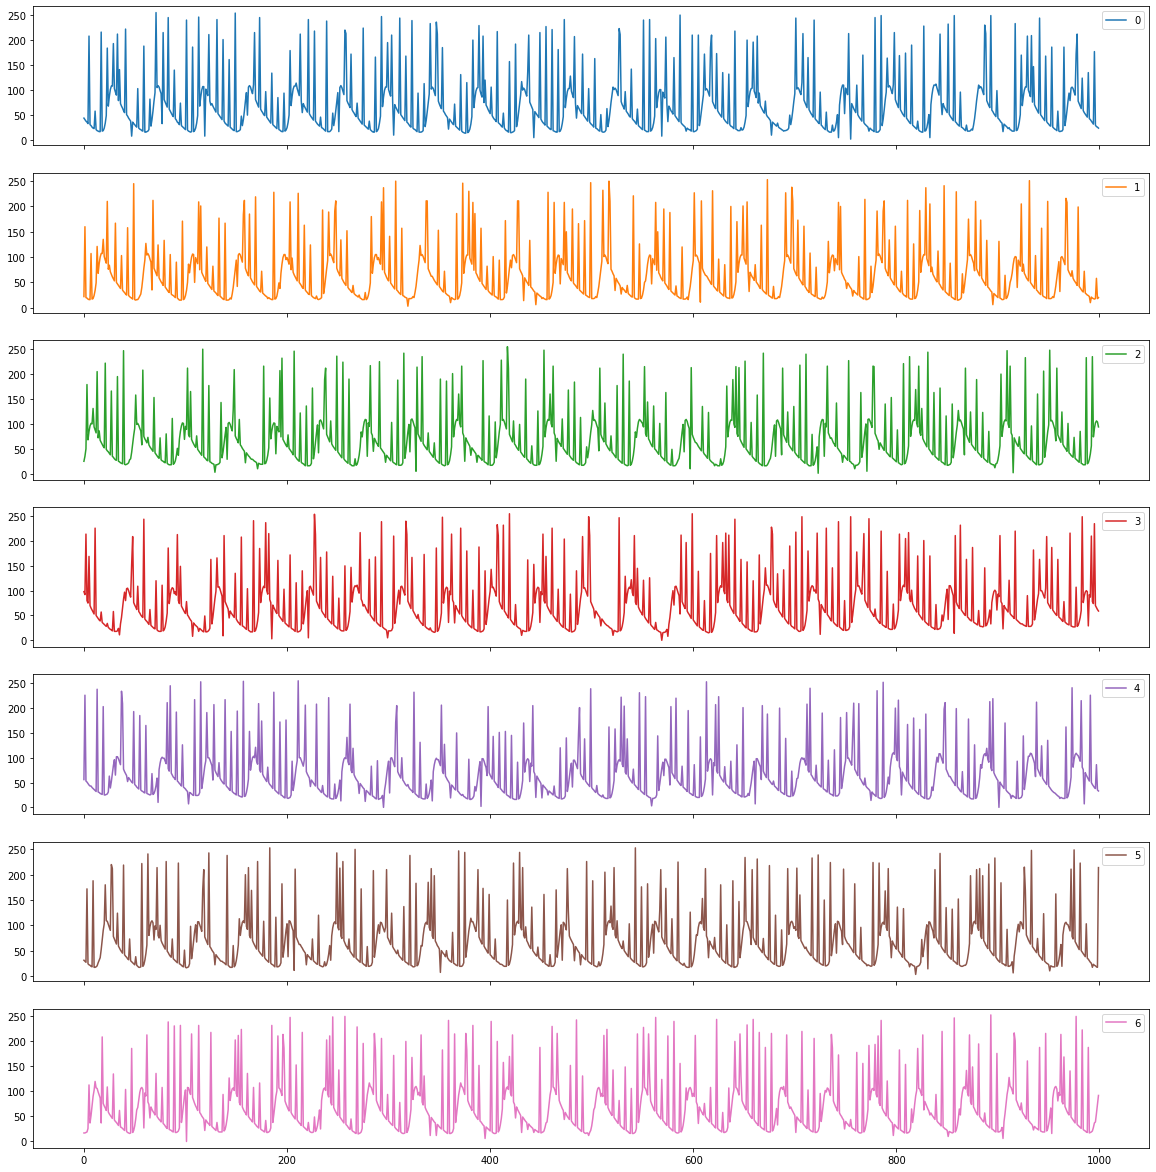

In [44]:
df.plot(subplots=True, figsize=(20, 21))

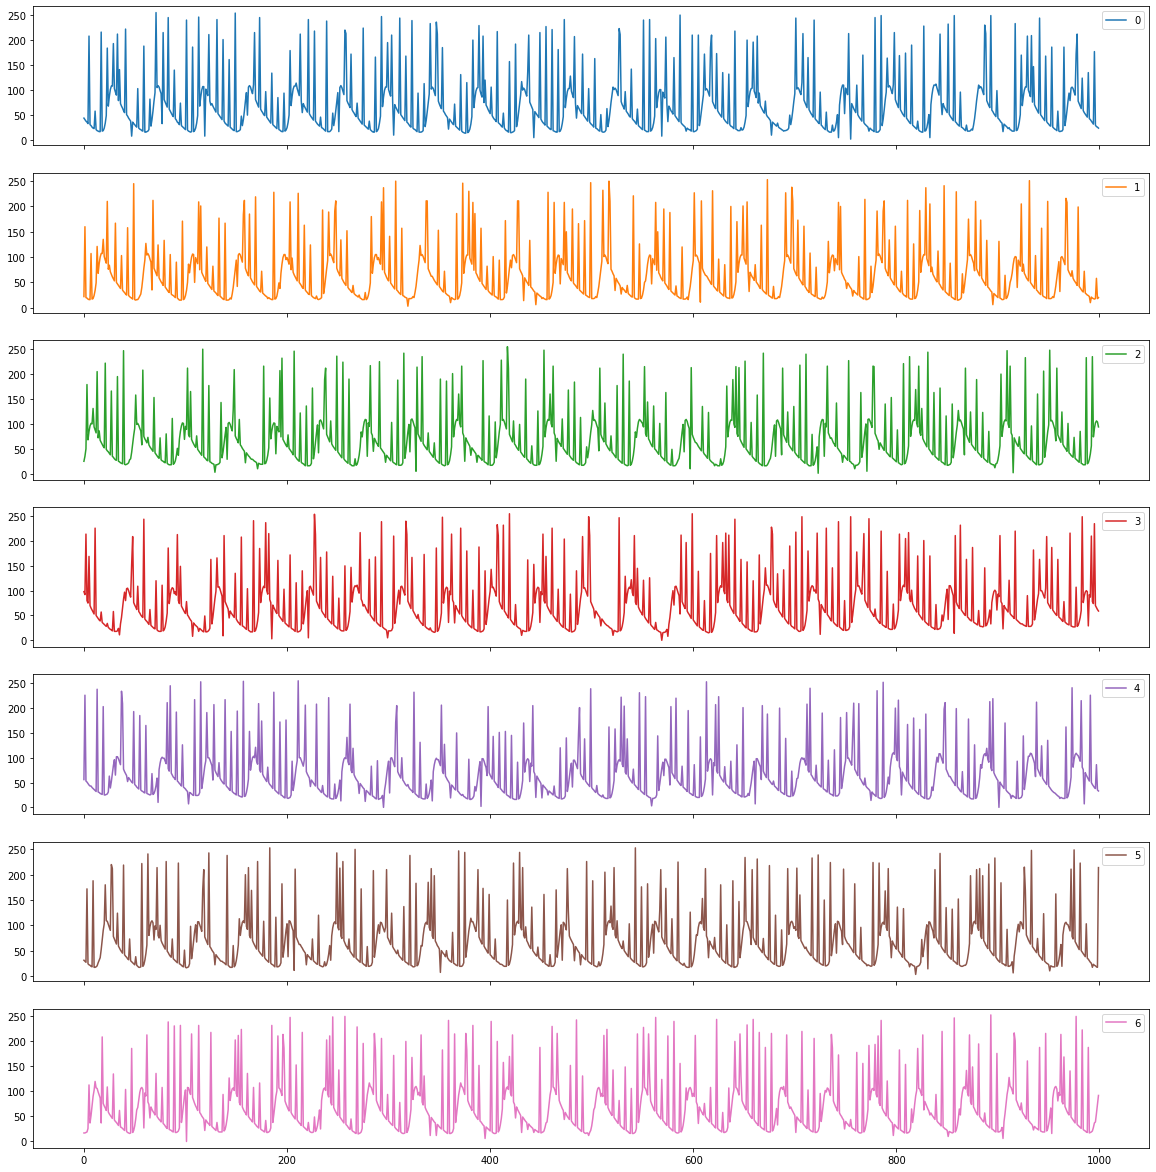

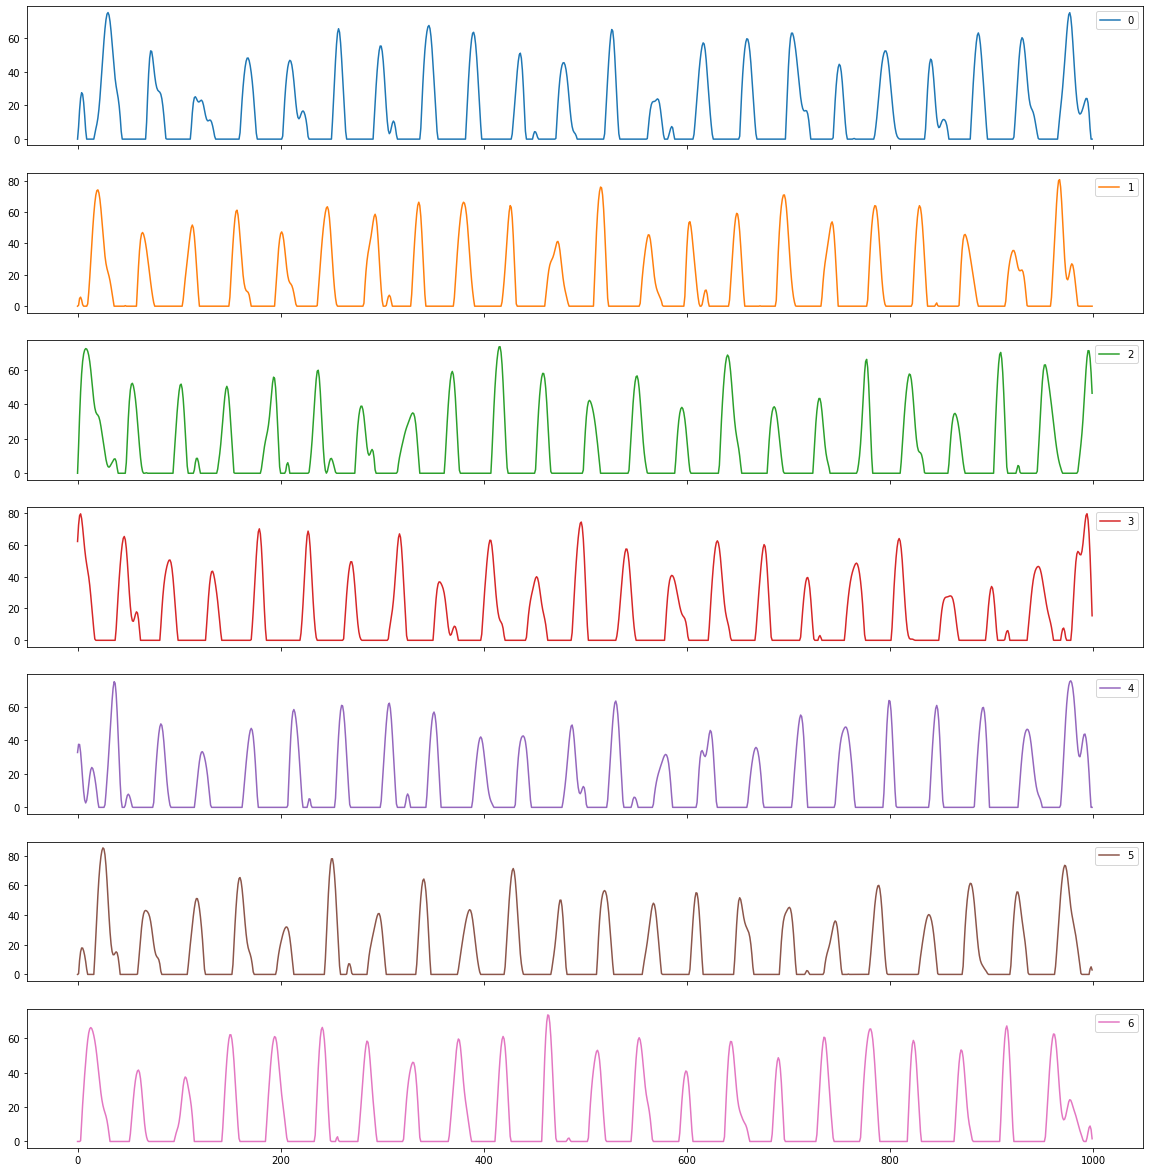

In [5]:
import neurokit2 as nk
import matplotlib.pyplot as plt

df_clean=pd.DataFrame()
df_raw=pd.DataFrame()

for i in range(7):
    ppg = df[i]
    signals, info = nk.ppg_process(ppg, sampling_rate=100)
    # fig = nk.ppg_plot(signals)

    # signals['PPG_Raw'].plot()
    # signals['PPG_Clean'].plot()
    # signals.plot(subplots=True)
    # plt.show()

    df_clean[i] = signals['PPG_Clean']
    df_raw[i] = signals['PPG_Raw']

df_raw.plot(subplots=True,figsize=(20,21))
plt.savefig("PPG_Raw.png")

df_clean.plot(subplots=True,figsize=(20,21))
plt.savefig("PPG_Clean.png")

In [11]:
ls=list(df[6])
for i in ls:
    print(i,end=',')

17,17,18,19,26,113,37,52,72,90,102,120,107,106,99,93,87,37,209,76,71,67,62,109,59,55,52,49,46,135,43,40,38,35,32,62,29,28,26,24,22,104,20,18,17,16,17,186,18,22,31,45,63,68,83,98,106,108,104,27,97,91,213,79,74,47,69,64,60,57,53,136,50,47,44,42,39,108,36,34,31,28,26,239,24,23,22,20,19,231,18,18,19,21,27,232,38,54,73,91,103,0,108,107,100,94,215,88,82,76,71,67,62,232,58,55,51,48,45,22,43,40,37,35,32,218,30,28,26,24,22,38,21,19,19,19,19,94,21,24,33,46,63,127,82,97,105,107,102,203,96,90,212,78,73,224,69,64,60,57,53,136,50,47,44,42,39,108,36,34,31,29,27,117,25,23,22,20,19,42,18,18,19,21,27,232,38,54,72,90,101,211,107,105,99,92,214,187,81,75,70,65,61,248,58,54,51,48,45,153,43,40,37,35,32,218,30,28,26,24,22,38,21,19,18,18,19,49,20,24,32,46,63,25,82,97,105,107,102,203,95,89,211,78,73,249,68,63,59,55,52,143,49,46,43,40,37,250,34,32,29,26,24,45,22,20,19,17,16,229,15,16,17,19,26,196,38,55,75,93,105,117,110,108,101,94,216,183,82,76,71,66,61,206,57,53,50,47,44,94,41,39,36,34,32,172,29,26,24,22,20,78,

###### show result

In [12]:
df_clean_cs = pd.DataFrame()
for i in range(7):
    with open('./v{}.txt'.format(i), 'r') as f:
        data = []
        for l in f.readlines():
            data.append(float(l.strip()))
    # data=[i if i>0 else 0 for i in data ]
    df_clean_cs[i] = data
df_clean_cs

,0,1,2,3,4,5,6
0,43.999887,21.999943,24.999936,97.999747,55.999856,30.999920,16.999956
1,43.973520,23.186277,25.085599,97.946886,57.460907,30.982321,16.999736
2,43.816450,27.943728,25.645670,98.732997,63.315831,30.877544,17.007692
3,43.364962,35.730325,28.404159,102.241417,72.875821,31.834687,17.058069
4,42.494816,42.323390,36.024236,107.733936,80.901594,36.321050,17.259133
...,...,...,...,...,...,...,...
995,-22.521219,-39.785114,20.039651,19.608524,1.858522,-40.106831,-23.396673
996,-21.591906,-37.857965,30.310592,25.496785,0.035754,-41.643729,-26.875018
997,-17.507747,-35.109923,38.875040,31.906458,-6.189496,-41.982972,-28.690001
998,-13.819495,-31.049536,44.467216,34.319068,-13.794196,-41.236552,-27.628233


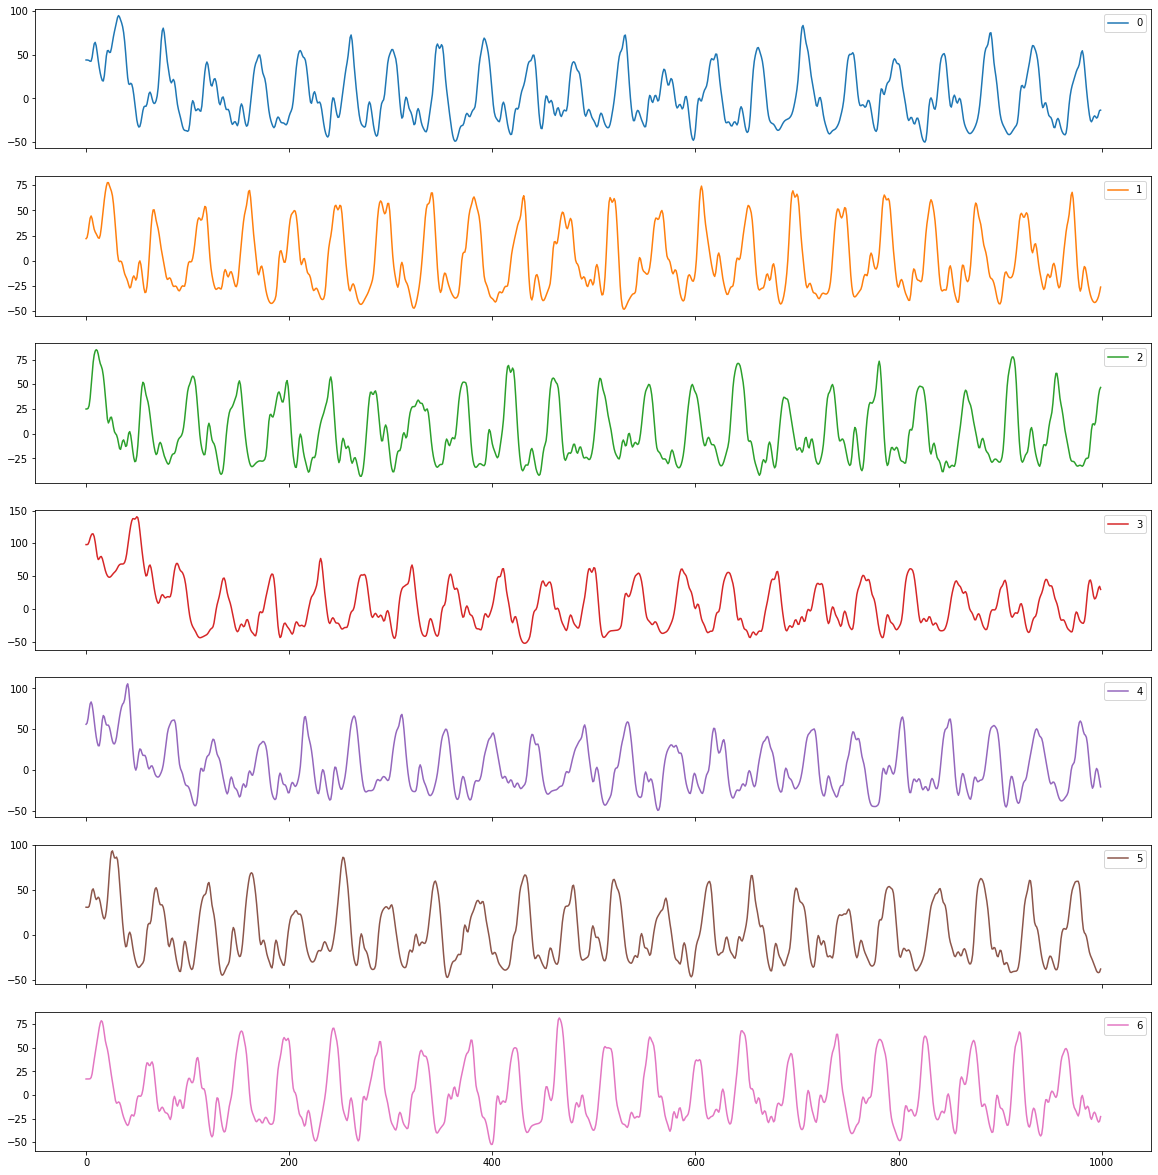

In [14]:
import matplotlib.pyplot as plt
df_clean_cs.plot(subplots=True,figsize=(20,21))
plt.savefig("csharp_Clean.png")

In [15]:
df_ro_3 = df_clean_cs.rolling(window=3).mean()
df_ro_3

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43.929952,24.376649,25.243735,98.226543,58.925531,30.953262,17.002461
3,43.718311,28.953443,26.378476,99.640433,64.550853,31.231517,17.021832
4,43.225409,35.332481,30.024688,102.902783,72.364415,33.011094,17.108298
...,...,...,...,...,...,...,...
995,-21.095259,-40.691706,13.494310,16.881759,-3.840335,-37.374332,-20.458815
996,-21.645293,-39.547001,20.657039,20.341643,-0.120381,-39.770874,-23.380701
997,-20.540291,-37.584334,29.741761,25.670589,-1.431740,-41.244510,-26.320564
998,-17.639716,-34.672475,37.884283,30.574104,-6.649313,-41.621084,-27.731084


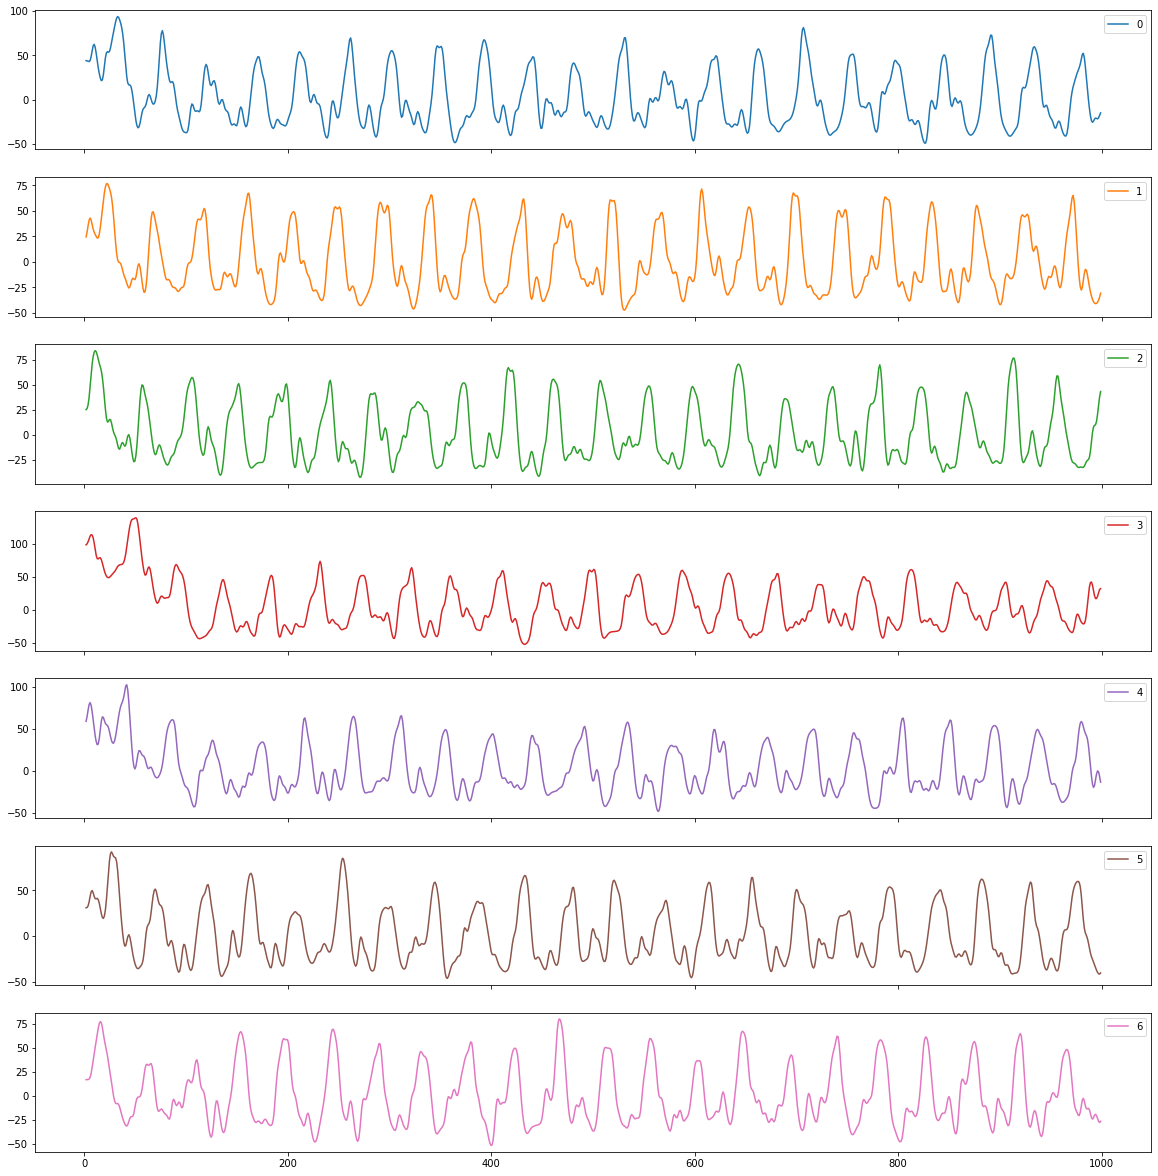

In [16]:
df_ro_3.plot(subplots=True,figsize=(20,21))
plt.savefig("df_ro_3.png")

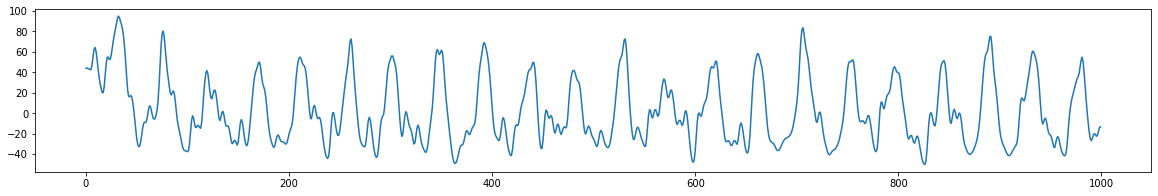

In [20]:
fig =plt.figure(figsize=(20,3))
plt.plot(data,figure=fig)

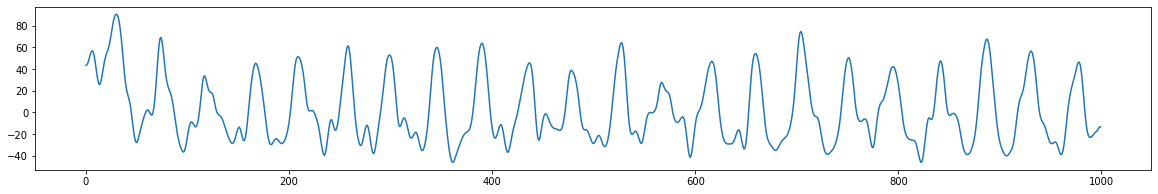

In [21]:
data2 = []
step = 6
for i, v in enumerate(data):
    data2.append(sum(data[i:i + step]) / len(data[i:i + step]))

fig = plt.figure(figsize=(20, 3))
plt.plot(data2, figure=fig)